# Laboratorio 5: Clasificación 🤗

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Primavera 2025</strong></center>


### Cuerpo Docente:

- Profesores: Diego Cortez, Gabriel Iturra
- Auxiliares: Melanie Peña, Valentina Rojas
- Ayudantes: Nicolás Cabello, Cristopher Urbina

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Andrés Oñate
- Nombre de alumno 2: Javier Zapata

### **Link de repositorio de GitHub:** [Insertar Repositorio](https://github.com/...../)

### Temas a tratar
- Clasificación en problemas desbalanceados
- Lightgbm y xgboost
- Pipelines

## Reglas:

- **Grupos de 2 personas**
- Fecha de entrega: Entregas Martes a las 23:59.
- Instrucciones del lab el viernes a las 16:15 en formato online. Asistencia no es obligatoria, pero se recomienda **fuertemente** asistir.
- <u>Prohibidas las copias</u>. Cualquier intento de copia será debidamente penalizado con el reglamento de la escuela.
- Tienen que subir el laboratorio a u-cursos y a su repositorio de github. Labs que no estén en u-cursos no serán revisados. Recuerden que el repositorio también tiene nota.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Pueden usar cualquier material del curso que estimen conveniente.





### Objetivos principales del laboratorio
- Comprender cómo trabajar con problemas de clasificación con clases desbalanceadas.
- Aplicar los modelos lightgbm y xgboost.
- Practicar Pipelines

# Parte Teórica [12 puntos]




1. Explique cuál es la diferencia entre los datos de entrenamiento y validación. [1 punto]

2. Explique cuál es el principal desafío al trabajar problemas de clasificación con data no supervisada. [1 punto]

3. Explique en **sus palabras** qué es la matriz de confusión y para qué se utiliza. [1 puntos]

4. Escriba la fórmula de las siguientes métricas y explique con **sus palabras** cómo se interpretan. [1 punto cada uno]

  * Accuracy
  * Precision
  * Recall
  * F1 score

5. Explique qué métrica recomendaría para los siguientes contextos de clasificación. [1 punto cada uno]

  * Mantenimiento predictivo de fallas de maquinaria pesada en la industria minera.  
  * Detección de enfermedades altamente contagiosas.
  * Aprobación de créditos de alto riesgo.
  * Detección de crímenes.

6. Explique qué es la calibración de modelos y para qué se usa. [1 punto]


**Respuesta:**

*Escriba su respuesta aquí*

1 . Los datos de entrenamiento se usan para que el modelo aprenda, es decir, para ajustar sus parámetros internos. En cambio, los de validación no se usan en el aprendizaje directo, sino que sirven para evaluar qué tan bien está funcionando el modelo y evitar que memorice demasiado (overfitting).

2. El problema más grande es que no se cuenta con etiquetas, entonces no se sabe a priori cuál es la “respuesta correcta” y eso hace difícil medir si el modelo realmente está clasificando bien. Se utilizan tecnicas como clustering o métricas de similitud.

3. La matriz de confusión es una tabla donde se comparan las predicciones del modelo con las respuestas reales. Sirve para ver no solo cuántas predicciones son correctas, sino también en qué se equivoca (por ejemplo, cuántos positivos predijo como negativos y viceversa).

4.

* **Accuracy (Exactitud):**  
$$
\text{accuracy} = \frac{\text{número de predicciones correctas}}{\text{número de predicciones totales}}
$$  
Mide qué fracción de todas las predicciones fueron correctas. Es útil cuando las clases están balanceadas.

* **Precision (Precisión):**  
$$
P = \frac{TP}{TP + FP}
$$  
Indica, de todos los casos que el modelo predijo como positivos, cuántos realmente lo eran.

* **Recall (Sensibilidad):**  
$$
R = \frac{TP}{TP + FN}
$$  
Mide, de todos los positivos reales, cuántos fue capaz de encontrar el modelo.

* **F1 Score:**  
$$
F1 = 2 \cdot \frac{P \cdot R}{P + R}
$$  
Es la media armónica entre precisión y recall.



5.
 - Mantenimiento predictivo de fallas de maquinaria pesada en la industria minera: Recall. Es más importante detectar todas las posibles fallas que tener mucha precisión, porque no se quiere dejar pasar una falla que puede costar la vida de una persona o millones en perdidas economicas.

- Detección de enfermedades altamente contagiosas = Recall.
Aquí lo crítico es no dejar sin detectar un enfermo, aunque tengamos algunos falsos positivos.

- Aprobación de créditos de alto riesgo : Precision. Es más importante asegurarnos de que cuando digamos “sí”, sea correcto, porque un falso positivo puede significar pérdidas económicas grandes.


- Detección de crímenes: Recall.
Lo esencial es no dejar pasar casos verdaderos, aunque se marquen algunos falsos positivos que luego se revisen.

6. La calibración de modelos es el proceso mediante el cual ajustamos las probabilidades que entrega un clasificador para que reflejen de manera fiel la probabilidad real de un evento. En otras palabras, no basta con que un modelo prediga bien las clases: también queremos que, si dice que un evento tiene un 70% de probabilidad, ese evento efectivamente ocurra 7 de cada 10 veces.
Esto es especialmente relevante en contextos donde las probabilidades guían decisiones críticas (ej. medicina, finanzas, sistemas de recomendación). Un modelo mal calibrado puede ser igual de riesgoso que un modelo con bajo accuracy, porque genera sobreconfianza o subestimación.

# Parte práctica [48 puntos]

<p align="center">
  <img src="https://drive.google.com/uc?export=view&id=1BnO4tyh3vM2P199Ec9s3JjngQ4qQ9seP"
" width="300">
</p>


Tras el trágico despido de la mítica mascota de Maipú, Renacín decide adentrarse como consultor en el mercado futbolero, el cuál (para variar...) está cargado en especulaciones.

Como su principal tarea será asesorar a los directivos de los clubes sobre cuál jugador comprar y cuál no, Renacín desea generar modelos predictivos que evaluén distintas características de los jugadores; todo con el fin de tomar decisiones concretas basadas en los datos.

Sin embargo, su condición de corporeo le impidió tomar la versión anterior de MDS7202, por lo que este motivo Renacín contrata a su equipo para lograr su objetivo final. Dado que aún tiene fuertes vínculos con la dirección de deportes de la municipalidad, el corporeo le entrega base de datos con las estadísticas de cada jugador para que su equipo empieze a trabajar ya con un dataset listo para ser usado.


**Los Datos**

Para este laboratorio deberán trabajar con el csv `statsplayers.csv`, donde deberán aplicar algoritmos de aprendizaje supervisado de clasificación en base a características que describen de jugadores de fútbol.

Para comenzar cargue el dataset señalado y a continuación vea el reporte **`Player_Stats_Report.html`** (adjunto en la carpeta del enunciado) que describe las características principales del `DataFrame`.

In [1]:
!pip install catboost

In [2]:
pip install pycaret

In [3]:
#pip install pycaret==3.0.4 #Instalamos en esta verion puesto que con la pycaret normal puede fallar

In [4]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
"""
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'https://drive.google.com/file/d/17nOZOvySMjPRvltNg6ER5PqV3SaFuVoQ/view?usp=share_link'
except:
    print('Ignorando conexión drive-colab')

"""

'\ntry:\n    from google.colab import drive\n    drive.mount("/content/drive")\n    path = \'https://drive.google.com/file/d/17nOZOvySMjPRvltNg6ER5PqV3SaFuVoQ/view?usp=share_link\'\nexcept:\n    print(\'Ignorando conexión drive-colab\')\n\n'

In [5]:
#Local

import pandas as pd
"""
path = '/content/stats_players.csv'

df = pd.read_csv(path, sep=',')
df.head()
"""

"\npath = '/content/stats_players.csv'\n\ndf = pd.read_csv(path, sep=',')\ndf.head()\n"

In [6]:
from google.colab import files
import pandas as pd

# Te abre un diálogo para seleccionar el archivo en tu PC
uploaded = files.upload()

# Si subiste "stats_players.csv":
df = pd.read_csv("stats_players.csv", sep=",")
df.head()

Saving stats_players.csv to stats_players (1).csv


,Name,Nationality,National_Position,Club_Position,Height,Weight,Preffered_Foot,Age,Work_Rate,Weak_foot,...,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys
0,Cristiano Ronaldo,Portugal,LS,LW,185,80,Right,32,High / Low,4,...,90,95,85,92,93,90,81,76,85,88
1,Lionel Messi,Argentina,RW,RW,170,72,Left,29,Medium / Medium,4,...,90,68,71,85,95,88,89,90,74,85
2,Neymar,Brazil,LW,LW,174,68,Right,25,High / Medium,5,...,96,61,62,78,89,77,79,84,81,83
3,Luis Suárez,Uruguay,LS,ST,182,85,Right,30,High / Medium,4,...,86,69,77,87,94,86,86,84,85,88
4,Manuel Neuer,Germany,GK,GK,193,92,Right,31,Medium / Medium,4,...,52,78,25,25,13,16,14,11,47,11


## 1. Predicción de Seleccionados Nacionales [14 puntos]

In [7]:
#Valores unicos en National_Position
df['National_Position'].value_counts()

#NA?
df.isna().sum()

,0
Name,0
Nationality,0
National_Position,16513
Club_Position,1
Height,0
Weight,0
Preffered_Foot,0
Age,0
Work_Rate,0
Weak_foot,0


In [8]:
#Eliminar observacion con NA en Club_Position
df = df.dropna(subset=['Club_Position'])

In [9]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

df.drop(columns=["Name", "Nationality"], inplace=True)

# Actualiza la lista de columnas categóricas
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Conteo de observaciones para variables categóricas
df[categorical_cols].value_counts()

National_Position  Club_Position  Preffered_Foot  Work_Rate      
Sub                Res            Right           Medium / Medium    67
                   GK             Right           Medium / Medium    44
                   Sub            Right           Medium / Medium    42
GK                 GK             Right           Medium / Medium    27
Sub                Sub            Right           High / Medium      22
                                                                     ..
LW                 LW             Right           High / Medium       1
                   LS             Right           High / Medium       1
                   LM             Right           High / Medium       1
LS                 Sub            Right           Medium / Medium     1
RCM                Res            Left            High / Medium       1
Name: count, Length: 464, dtype: int64

<p align="center">
  <img src="https://www.futuro.cl/wp-content/uploads/2016/06/chile-argentina-meme-12.jpg" width="300">
</p>



### 1.1 Preprocesamiento [5 puntos]

Tareas:

1. Genere los labels para la clasificación binaria en una variable llamada `label`. Para esto, trabaje sobre el atributo `National_Position` suponiendo que los valores nulos son jugadores no seleccionados para representar a su país. [Sin puntaje]

2. Hecho esto, ¿cuántos se tienen ejemplos por cada clase? Comente lo que observa. [1 punto]

3. Genere un `ColumnTransformer` en donde especifique las transformaciones que hay que realizar para cada columna (por ejemplo StandarScaler, MinMaxScaler, OneHotEncoder, etc...) para que puedan ser utilizadas correctamente por el modelo predictivo y guárdelo una variable llamada `col_transformer`. [2 puntos]

4. Comente y justifique las transformaciones elegidas sobre cada una de las variables (para esto utilice el material `Player_Stats_Report.html` que viene en el zip del lab), al igual que las transformaciones aplicadas. [2 puntos]

In [10]:
#Si National_Position es null entonces 0, si no 1
df["labels"] = df["National_Position"].apply(lambda x: 0 if pd.isna(x) else 1)

df["labels"].value_counts()

,count
labels,
0,16512
1,1075


**Respuesta:**

Existe un fuerte desbalance entre las clases, con muchos más jugadores que no han sido seleccionados (label 0) en comparación con los que sí lo han sido (label 1). Esto puede afectar el rendimiento del modelo, ya que podría tender a predecir siempre la clase mayoritaria.

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

#condicional para numericas
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

#condicional para categoricas
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
#eliminar la columna target de las categoricas
categorical_cols.remove('National_Position')


col_transformer = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

Comentario y justificación.

Dado que donde esta la mayor parte de los NA es a partir de donde se arma la etiqueta esta columna no se borra.
Se nota una observación con NA en Club_Position, la cuál se borra porque podria afectar el modelo.

Para las variables numéricas continuas (ej. Height, Weight, Age, Marking, Sliding_Tackle, etc.), aplicamos StandardScaler, ya que presentan diferentes escalas y unidades de medida. Esta transformación centra cada variable en media 0 y varianza 1, permitiendo que los modelos sensibles a escala (SVM, kNN, regresión logística, redes neuronales) traten todas las features de forma comparable.
Aunque algunas variables muestran distribuciones multimodales o con leves sesgos (como Marking o Interceptions), no presentan outliers extremos ni distorsiones graves, por lo que StandardScaler sigue siendo adecuado.

Para las variables categóricas, aplicamos OneHotEncoder, que genera variables binarias para cada categoría. Para las columnas de alta cardinalidad, se explorara la posibilidad de no añadirlas al modelo si no aportan información relevante.

### 1.2 Entrenamiento [3 puntos]

Ahora, vamos a entrenar los pipelines generados en los pasos anteriores. Para esto, debe realizar las siguientes tareas:

1. Separe los datos de entrenamiento en un conjunto de entrenamiento y de prueba  (la proporción queda a su juicio). En este paso, seleccione los ejemplos de forma aleatoria e intente mantener la distribución original de labels de cada clase en los conjuntos de prueba/entrenamiento. (vea la documentación de `train_test_split`). [1 puntos]


2. Defina un pipeline llamado `pipeline_xgboost` y otro llamado `pipeline_lightgbm`. Estos pipelines deben tener el mismo ColumnTransformer definido en la sección de preprocesamiento, pero deben variar los clasificadores de acuerdo al nombre de cada pipeline. [1 puntos]

3. Entrene los pipelines. [1 punto]



**Respuesta:**

In [12]:
from sklearn.model_selection import train_test_split

#generar df2 con un 10% de los datos
df2 = df.copy()


# definimos features y target
X = df2.drop(columns=["labels"])
y = df2["labels"]

# split 80/20 con estratificación para mantener distribución de clases
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


numerical_cols   = X.select_dtypes(include=["int64","float64"]).columns.tolist()
categorical_cols = X.select_dtypes(include=["object","category"]).columns.tolist()


col_transformer = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
    ]
)

# 5) Ajustar con train y transformar train/test
X_train_pre = col_transformer.fit_transform(X_train)
X_test_pre  = col_transformer.transform(X_test)

print(X_train_pre.shape, X_test_pre.shape)

(14069, 101) (3518, 101)


In [13]:
#!pip install xgboost
#!pip install lightgbm

In [14]:
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

pipeline_xgboost = Pipeline(steps=[
    ("prep", col_transformer),
    ("clf", XGBClassifier(random_state=42))
])

pipeline_lightgbm = Pipeline(steps=[
    ("prep", col_transformer),
    ("clf", LGBMClassifier(random_state=42))
])


In [15]:
# 4) Entrenamiento
pipeline_xgboost.fit(X_train, y_train)
pipeline_lightgbm.fit(X_train, y_train)



[LightGBM] [Info] Number of positive: 860, number of negative: 13209
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002974 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2551
[LightGBM] [Info] Number of data points in the train set: 14069, number of used features: 82
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.061127 -> initscore=-2.731721
[LightGBM] [Info] Start training from score -2.731721
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Height', 'Weight', 'Age',
                                                   'Weak_foot', 'Skill_Moves',
                                                   'Ball_Control', 'Dribbling',
                                                   'Marking', 'Sliding_Tackle',
                                                   'Standing_Tackle',
                                                   'Aggression', 'Reactions',
                                                   'Interceptions', 'Vision',
                                                   'Composure', 'Crossing',
                                                   'Short_Pass', 'Long_Pass',
                                                   'Acceleration', 'Speed',
                                                   'Stamina', 'Strength',
                                                   'Balance', 'Agility',
                                                   'Jumping', 'Heading',
                                                   'Shot_Power', 'Finishing',
                                                   'Long_Shots', 'Curve', ...]),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['National_Position',
                                                   'Club_Position',
                                                   'Preffered_Foot',
                                                   'Work_Rate'])])),
                ('clf', LGBMClassifier(random_state=42))])

### 1.3 Resultados [6 puntos]

1. Calcule las métricas accuracy, precisión y recall de la clase positiva (la que indica que un jugador es seleccionado nacional) para evaluar el rendimiento de los distintos modelos. Verifique sus resultados usando `classification_report`. [2 puntos]

2. Explique qué implican los valores de accuracy, precisión y recall de la clase positiva (la que indica que un jugador es seleccionado nacional) y cómo influye la cantidad de ejemplos por clase en los resultados obtenidos. [2 puntos]

3. Explique qué métrica le parece más adecuada y concluya qué modelo tiene un mejor desempeño. [2 puntos]


=== XGBoost ===
Accuracy: 1.0000 | F1-macro: 1.0000

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3303
           1       1.00      1.00      1.00       215

    accuracy                           1.00      3518
   macro avg       1.00      1.00      1.00      3518
weighted avg       1.00      1.00      1.00      3518



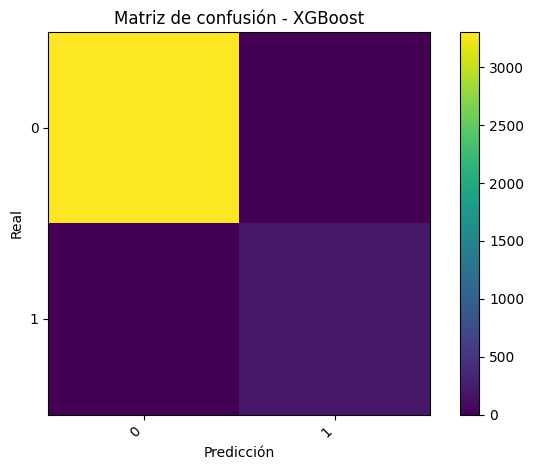


=== LightGBM ===
Accuracy: 1.0000 | F1-macro: 1.0000

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3303
           1       1.00      1.00      1.00       215

    accuracy                           1.00      3518
   macro avg       1.00      1.00      1.00      3518
weighted avg       1.00      1.00      1.00      3518



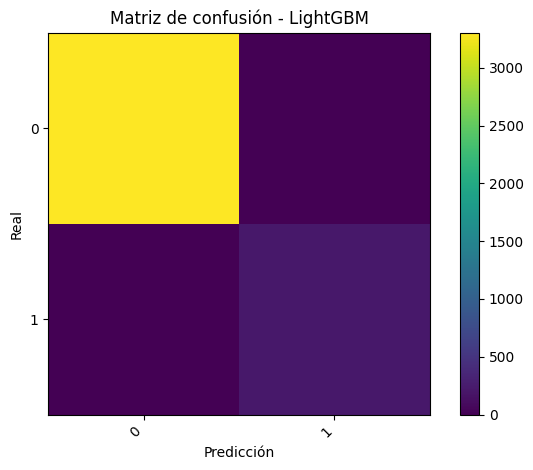


Resumen:
XGBoost  -> Acc: 1.0000 | F1-macro: 1.0000
LightGBM -> Acc: 1.0000 | F1-macro: 1.0000
Mejor por F1-macro: XGBoost


In [16]:
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# 5) Predicciones
y_pred_xgb = pipeline_xgboost.predict(X_test)
y_pred_lgb = pipeline_lightgbm.predict(X_test)

# 6) Métricas
def eval_model(y_true, y_pred, nombre):
    acc = accuracy_score(y_true, y_pred)
    f1m = f1_score(y_true, y_pred, average="macro")
    print(f"\n=== {nombre} ===")
    print(f"Accuracy: {acc:.4f} | F1-macro: {f1m:.4f}")
    print("\nClassification report:")
    print(classification_report(y_true, y_pred))

    # Matriz de confusión
    labels = np.unique(y_true)
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    fig = plt.figure()
    plt.imshow(cm, interpolation="nearest")
    plt.title(f"Matriz de confusión - {nombre}")
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45, ha="right")
    plt.yticks(tick_marks, labels)
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.tight_layout()
    plt.show()

    return acc, f1m

acc_xgb, f1_xgb = eval_model(y_test, y_pred_xgb, "XGBoost")
acc_lgb, f1_lgb = eval_model(y_test, y_pred_lgb, "LightGBM")

print("\nResumen:")
print(f"XGBoost  -> Acc: {acc_xgb:.4f} | F1-macro: {f1_xgb:.4f}")
print(f"LightGBM -> Acc: {acc_lgb:.4f} | F1-macro: {f1_lgb:.4f}")
best = "XGBoost" if f1_xgb >= f1_lgb else "LightGBM"
print(f"Mejor por F1-macro: {best}")

**Respuesta:**

Como la clase positiva (jugadores seleccionados) es mucho menor que la negativa, esto implica que un modelo podría lograr un accuracy alto simplemente prediciendo siempre la clase mayoritaria, sin realmente identificar a los seleccionados. En este contexto, es clave mirar métricas como el recall de la clase positiva, ya que muestra cuántos seleccionados detecta el modelo, y también la precisión, que indica qué tan confiables son esas predicciones. Si solo se evaluara con accuracy, se podría ocultar un mal rendimiento en la clase minoritaria.

Dado el desbalance, la métrica más adecuada es el F1-macro, porque equilibra precisión y recall en ambas clases y evita que la minoritaria quede invisibilizada. El recall de la clase positiva es especialmente importante, pero usar solo recall puede ser engañoso; el F1-macro resume de manera más justa el desempeño general. En los resultados obtenidos, tanto XGBoost como LightGBM alcanzaron métricas perfectas (accuracy y F1-macro de 1.0), por lo que no se observa diferencia de desempeño entre ellos en este conjunto de prueba. La comparación real entre modelos debería hacerse con validación cruzada o un conjunto externo para confirmar si mantienen este rendimiento.

## 2. Predicción de posiciones de jugadores [4 puntos]

<p align="center">
  <img src="https://pbs.twimg.com/media/E1rfA1aWEAYU6Ny.jpg" width="300">
</p>

En una nueva jornada de desmesuradas transacciones deportivas, Renacín escuchó a sus colegas discutir acerca de que el precio de cada jugador depende en gran medida de la posición en la cancha en la que juega. Y además, que hay bastantes jugadores nuevos que no tienen muy claro en que posición verdaderamente brillarían, por lo que actualmente puede que actualmente estén jugando en posiciones sub-optimas.

Viendo que los resultados del primer análisis no son tan esperanzadores, el corporeo los comanda a cambiar su tarea: ahora, les solicita que construyan un clasificador enfocado en predecir la mejor posición de los jugadores en la cancha según sus características.

Para lograr esto, primero, les pide que etiqueten de la siguiente manera los valores que aparecen en el atributo `Club_Position`, pidiendo que agrupen los valores en los siguientes grupos:

**Nota**:  Renacín les recalca que **no deben utilizar los valores ```Sub``` y ```Res``` de esta columna**.

```python
ataque = ['ST', 'CF']
central_ataque = ['RW', 'CAM', 'LW']
central = ['RM', 'CM', 'LM']
central_defensa = ['RWB', 'CDM', 'LWB']
defensa = ['RB', 'CB', 'LB']
arquero = ['GK']
```

La elección del clasificador se justificar en base a la siguiente [guía](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) y se deben comentar los resultados obtenidos en la clasificación.

**Tareas:** [1 punto por tarea]

1. En un nuevo dataframe, aplique las etiquetas descritas anteriormente en cada uno de los valores señalados en esta sección y guárdelos en la variable `label`.
2. Cuente cuántos por clase quedan.
3. Entrene el nuevo pipeline y ejecute una evaluación de este.  
4. Comente los resultados obtenidos.

**Respuesta:**

In [17]:
# =========================
# 1) Etiquetado de Club_Position -> label
# =========================

# Grupos definidos
ataque = ['ST', 'CF']
central_ataque = ['RW', 'CAM', 'LW']
central = ['RM', 'CM', 'LM']
central_defensa = ['RWB', 'CDM', 'LWB']
defensa = ['RB', 'CB', 'LB']
arquero = ['GK']

# Creamos un mapeo posición -> grupo
pos2grp = {}
for p in ataque:            pos2grp[p] = 'ataque'
for p in central_ataque:    pos2grp[p] = 'central_ataque'
for p in central:           pos2grp[p] = 'central'
for p in central_defensa:   pos2grp[p] = 'central_defensa'
for p in defensa:           pos2grp[p] = 'defensa'
for p in arquero:           pos2grp[p] = 'arquero'

# Filtramos filas sin posición útil (no usar 'Sub' ni 'Res')
mask_valid = (~df2['Club_Position'].isin(['Sub','Res'])) & (df2['Club_Position'].notna())
df_clean = df2.loc[mask_valid].copy()

# Generamos la etiqueta
df_clean['label'] = df_clean['Club_Position'].map(pos2grp)

# En caso de que haya posiciones no contempladas en el mapeo, las quitamos
df_clean = df_clean[df_clean['label'].notna()].copy()

# Vista rápida
df_clean[['Club_Position', 'label']].head()


,Club_Position,label
0,LW,central_ataque
1,RW,central_ataque
2,LW,central_ataque
3,ST,ataque
4,GK,arquero


In [18]:
# =========================
# 2) Conteo por clase
# =========================
counts = df_clean['label'].value_counts().sort_index()
print("Conteo por clase:\n", counts)


Conteo por clase:
 label
arquero             632
ataque              430
central             907
central_ataque      581
central_defensa     209
defensa            1180
Name: count, dtype: int64


In [19]:
print(X.columns.tolist())

['National_Position', 'Club_Position', 'Height', 'Weight', 'Preffered_Foot', 'Age', 'Work_Rate', 'Weak_foot', 'Skill_Moves', 'Ball_Control', 'Dribbling', 'Marking', 'Sliding_Tackle', 'Standing_Tackle', 'Aggression', 'Reactions', 'Interceptions', 'Vision', 'Composure', 'Crossing', 'Short_Pass', 'Long_Pass', 'Acceleration', 'Speed', 'Stamina', 'Strength', 'Balance', 'Agility', 'Jumping', 'Heading', 'Shot_Power', 'Finishing', 'Long_Shots', 'Curve', 'Freekick_Accuracy', 'Penalties', 'Volleys']


In [20]:
from sklearn.linear_model import SGDClassifier
X = df_clean.drop(columns=['Club_Position', 'label'])

#Predecir label
y = df_clean['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Detectar tipos
numerical_cols   = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()


col_transformer = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# Ajustar y transformar
X_train_pre = col_transformer.fit_transform(X_train)
X_test_pre  = col_transformer.transform(X_test)





=== SGDClassifier ===
Accuracy: 0.7056 | F1-macro: 0.6295

Classification report:
                 precision    recall  f1-score   support

        arquero       1.00      1.00      1.00       125
         ataque       0.74      0.88      0.80        86
        central       0.63      0.39      0.48       192
 central_ataque       0.42      0.56      0.48       114
central_defensa       0.25      0.12      0.16        41
        defensa       0.79      0.92      0.85       230

       accuracy                           0.71       788
      macro avg       0.64      0.65      0.63       788
   weighted avg       0.70      0.71      0.69       788



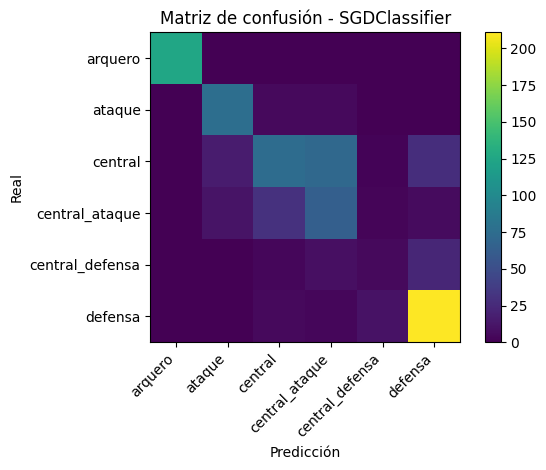

In [21]:
# Modelo lineal entrenado por descenso estocástico

sgd = SGDClassifier(
    loss="log_loss",
    penalty="l2",
    alpha=1e-4,
    max_iter=5000,
    tol=1e-4,
    early_stopping=True,
    validation_fraction=0.1,
    class_weight="balanced",# para manejar desbalance
    random_state=42
)

# Entrenar
sgd.fit(X_train_pre, y_train)

# Predecir
y_pred = sgd.predict(X_test_pre)

# Métricas
acc = accuracy_score(y_test, y_pred)
f1m = f1_score(y_test, y_pred, average="macro")
print(f"\n=== SGDClassifier ===")
print(f"Accuracy: {acc:.4f} | F1-macro: {f1m:.4f}\n")
print("Classification report:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
labels = np.sort(y_train.unique())
cm = confusion_matrix(y_test, y_pred, labels=labels)

plt.figure()
plt.imshow(cm, interpolation="nearest")
plt.title("Matriz de confusión - SGDClassifier")
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45, ha="right")
plt.yticks(tick_marks, labels)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()

El modelo clasifica las clases con exactitud a pesar del desbalance, considerando que hay 6 clases, superando el umbral aleatorio de 16%, funcionando mejor para arquero, clase que predice con exactitud perfecta, tambien cabe destacar que en todos los casos la clase que predice más es la real, salvo en el caso de central_defensa, que es superada por la clase defensa, aun asi se puede concordar que al menos son clases similares.

## 3. Predicciones de Seleccionados Nacionales para el Jere Klein [30 puntos]

<center>
<img src='https://www.radioactiva.cl/wp-content/uploads/2024/04/Jere-Klein-1-768x432.webp' width=500 />

Después de alcanzar la fama como cantante urbano, Jere Klein decide explorar una nueva faceta. Con su amor por el fútbol y convencido de que los artistas urbanos poseen un talento y versatilidad excepcionales, Jere se embarca en un proyecto innovador: desarrollar un sistema de inteligencia artificial capaz de identificar a jugadores que tienen potencial para convertirse en futbolistas profesionales. Su teoría es que muchos artistas del género urbano chileno, con sus habilidades únicas y su disciplina, podrían destacarse también en el deporte. Con este sistema, Jere espera no solo abrir nuevas oportunidades para sus colegas artistas, sino también demostrar la amplia gama de talentos que pueden ofrecer.

### 2.1 ¿Qué modelo de árbol es más de "pana"? [10 puntos]

<center>
<img src='https://64.media.tumblr.com/39189215a7d3d96823cb359f35b44e05/tumblr_psmrhrR3Xw1qf5hjqo4_540.gif' width=300 />


**Tareas**


1. Considerando el la variable llamada `label` creada en la sección 1.1. Para determinar cuál modelo de árbol sería más adecuado para la tarea en cuestión, utilice PyCaret. Este deberá centrarse exclusivamente en modelos de tipo árbol. Jere ha especificado que busca un modelo que tome decisiones rápidamente y que tenga una baja tasa de falsos positivos, ya que planea invertir en estos jugadores. [3 puntos]

Para la comparación, utilice los siguientes modelos:

```python
['et', 'rf', 'dt', 'xgboost', 'lightgbm', 'catboost']
```

2. Explique en brevemente que son los modelos de la siguiente lista `['et', 'rf', 'dt']` y como funcionan. [3 punto]

3. Tras realizar la comparación de modelos, seleccione aquel que muestre el mejor rendimiento en términos de velocidad y precisión, especialmente en la reducción de falsos positivos. Utilice la función `evaluate_model` de PyCaret para revisar y analizar los resultados obtenidos en los siguientes aspectos:

  - **Confusión Matrix**: ¿Cómo se encuentran la tasa de verdaderos positivos y verdaderos negativos?
  - **Threshold**: ¿Es acaso el umbral por defecto del modelo el mejor para las predicciones?
  - **Feature Importance**: ¿Cuáles son las variables con mejor desempeño? ¿A qué podría deberse esto?
  - **Learning Curve**: ¿El modelo presenta algún problema?

  [4 puntos]

**Respuesta**

In [22]:
from pycaret.datasets import get_data
from pycaret.classification import *
import os
from catboost import CatBoostClassifier

os.environ["PYCARET_CUSTOM_LOGGING_LEVEL"] = "CRITICAL"

exp = setup(
    data=df_clean,
    target="label",              # variable objetivo
    train_size=0.8,              # 80% train / 20% test
    session_id=42,               # reproducibilidad
    normalize=False,             # no normalizamos porque son árboles
    verbose=False
)

# 2) Comparar SOLO modelos de tipo árbol solicitados
models_to_compare = ['et', 'rf', 'dt', 'xgboost', 'lightgbm' , 'catboost'
]
best_model = compare_models(include=models_to_compare)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.4910
catboost,CatBoost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,15.3390
et,Extra Trees Classifier,0.9994,1.0000,0.9994,0.9994,0.9994,0.9992,0.9992,0.9900
dt,Decision Tree Classifier,0.9990,0.9994,0.9990,0.9991,0.9990,0.9988,0.9988,0.1260
lightgbm,Light Gradient Boosting Machine,0.9990,1.0000,0.9990,0.9991,0.9990,0.9988,0.9988,2.1740
rf,Random Forest Classifier,0.9946,0.9999,0.9946,0.9947,0.9945,0.9932,0.9932,0.5130


Processing:   0%|          | 0/29 [00:00<?, ?it/s]

In [23]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [24]:
cm

array([[125,   0,   0,   0,   0,   0],
       [  0,  76,   5,   5,   0,   0],
       [  0,  16,  75,  71,   2,  28],
       [  0,  11,  30,  64,   3,   6],
       [  0,   0,   4,   9,   5,  23],
       [  0,   0,   5,   4,  10, 211]])

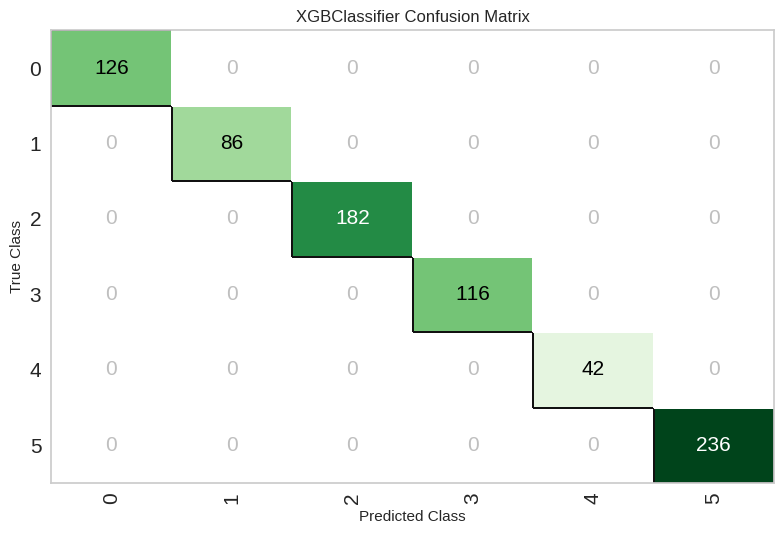

Matriz de confusión:
                                     Model  Accuracy     AUC  Recall   Prec.  \
xgboost         Extreme Gradient Boosting    1.0000  1.0000  1.0000  1.0000   
catboost              CatBoost Classifier    1.0000  1.0000  1.0000  1.0000   
et                 Extra Trees Classifier    0.9994  1.0000  0.9994  0.9994   
dt               Decision Tree Classifier    0.9990  0.9994  0.9990  0.9991   
lightgbm  Light Gradient Boosting Machine    0.9990  1.0000  0.9990  0.9991   
rf               Random Forest Classifier    0.9946  0.9999  0.9946  0.9947   

              F1   Kappa     MCC  TT (Sec)  
xgboost   1.0000  1.0000  1.0000     0.491  
catboost  1.0000  1.0000  1.0000    15.339  
et        0.9994  0.9992  0.9992     0.990  
dt        0.9990  0.9988  0.9988     0.126  
lightgbm  0.9990  0.9988  0.9988     2.174  
rf        0.9945  0.9932  0.9932     0.513  


In [25]:
# Grafica la matriz de confusión
plot_model(best_model, plot='confusion_matrix')

# Recupera la última salida tabular mostrada por PyCaret (la CM)
cm_df = pull().copy()  # DataFrame de la matriz de confusión
print("Matriz de confusión:\n", cm_df)


# cm_df suele venir como tabla con índices/columnas de clase
cm = cm_df.to_numpy()
classes = cm_df.index.to_list()


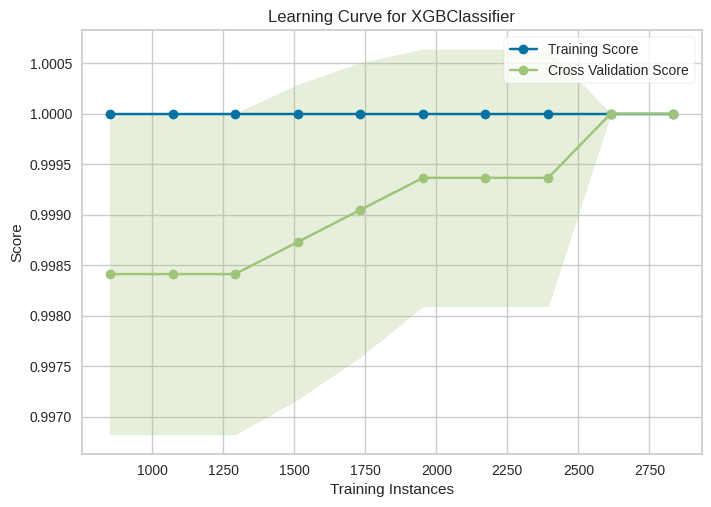

In [26]:
plot_model(best_model, plot='learning')

No evaluamos en threshold ya que es un modelo multiclase,
el modelo que mejor funciono fue xgboost, aunque tambien serviria catboost, con metricas perfectas de clasificacion, notar que no se tienen falsos positivos ni negativos en ninguna clase como se puede ver en la matriz de confusión, llegando al puntaje perfecto en aproximadamente 2600 instancias de entrenamiento como indica el grafico de learning curve, que tambien nos permite apreciar como el modelo sin hacer cross validation tendia a sobreajustar.
Aun asi los resultados en general para los modelos son bastante buenos, superando los 0.99 de f1 score en todos los casos

### 2.2 Reducción de dimensionalidad [14 puntos]

<center>
<img src='https://i.kym-cdn.com/photos/images/original/002/258/560/668.gif' width=400 />

A pesar de los resultados obtenidos previamente, el manager de Jere ha solicitado el entrenamiento de un modelo de XGBoost utilizando los datos disponibles. Además, se debe proceder a realizar una reducción de dimensionalidad basada en la importancia de las características.

Para llevar a cabo esta tarea:

1. Inicie entrenando un modelo XGBoost con todas las características disponibles. [2 puntos]

2. Una vez el modelo esté entrenado, evalúe y clasifique las características según su importancia de forma descendente. [2 puntos]

3. Utilice esta clasificación para ejecutar una búsqueda recursiva de eliminación de características, eliminando progresivamente las menos importantes y evaluando el impacto en el desempeño del modelo hasta identificar las N características más críticas. [2 puntos]

4. Con este conjunto reducido de características, entrene un nuevo modelo y evalúe su rendimiento. [2 puntos]

5. Posteriormente, responda a las siguientes preguntas para una comprensión más profunda de los cambios y beneficios:

  - ¿El rendimiento del modelo con las características seleccionadas es similar al del modelo original? ¿Cómo se comparan en términos de precisión y robustez? [2 puntos]
  - ¿Cuáles son los beneficios potenciales de eliminar variables del modelo? Considere factores como la simplificación del modelo, reducción del tiempo de entrenamiento, y mejora en la capacidad de generalización. [2 puntos]
  - Comente si el modelo con menor dimensionalidad es más sencillo de explicar. Explique brevemente por qué la eliminación de ciertas características puede facilitar la comprensión y la explicación del comportamiento del modelo. [2 puntos]

Notar que con esta metodologia buscamos encontrar un punto entermedio entre número de festures y desempeño. por esto, si observa que al aumentar festires el aumento es despreciable, puede no considerar agregar más features a su modelo.

**Respuesta**

In [27]:
from sklearn.preprocessing import LabelEncoder

# Definir las variables X e y desde df_clean
X = df_clean.drop(columns=['Club_Position', 'label'])
y = df_clean['label']

# Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Codificar las etiquetas de y (target)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded  = label_encoder.transform(y_test)

# Detectar columnas numéricas y categóricas
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()

# Crear el ColumnTransformer para el preprocesamiento
col_transformer = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'  # Para asegurarnos de que las columnas adicionales se mantengan
)

# Obtener los nombres de las características transformadas (antes de aplicar transformaciones)
feature_names = col_transformer.fit(X_train).get_feature_names_out()

# Crear el pipeline con XGBClassifier
pipeline_xgboost = Pipeline(steps=[
    ("prep", col_transformer),
    ("clf", XGBClassifier(
        n_estimators=500,
        max_depth=6,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        eval_metric='mlogloss',
        n_jobs=-1
    ))
])

# Ajustar el modelo con los datos de entrenamiento transformados
pipeline_xgboost.fit(X_train, y_train_encoded)

# Evaluar el modelo
y_pred_full_encoded = pipeline_xgboost.predict(X_test)

# Deshacer la codificación de las predicciones para obtener las etiquetas originales
y_pred_full = label_encoder.inverse_transform(y_pred_full_encoded)

# Evaluación
acc_full = accuracy_score(y_test, y_pred_full)
f1_full = f1_score(y_test, y_pred_full, average='macro')
print(f"Pipeline XGB (todas features) -> Accuracy={acc_full:.4f} | F1-macro={f1_full:.4f}")

# Extraer importancias con nombres de características
clf = pipeline_xgboost.named_steps["clf"]
importances = clf.feature_importances_

# Crear un DataFrame de las importancias con los nombres de las características
feature_importances_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)




Pipeline XGB (todas features) -> Accuracy=0.7449 | F1-macro=0.6768


In [28]:
feature_importances_df.head()

,Feature,Importance
4,num__Skill_Moves,0.358928
8,num__Sliding_Tackle,0.075868
27,num__Finishing,0.051672
52,cat__National_Position_RDM,0.051342
6,num__Dribbling,0.029290


In [29]:
# Importancias
prep = pipeline_xgboost.named_steps["prep"]  # Esto es para acceder al preprocesamiento en el pipeline
feature_names = prep.get_feature_names_out()  # Obtener los nombres de las características transformadas
importances = clf.feature_importances_  # Obtener las importancias de las características

# Crear un DataFrame de las importancias con los nombres de las características
feat_importances = (
    pd.DataFrame({"feature": feature_names, "importance": importances})
    .sort_values("importance", ascending=False)
    .reset_index(drop=True)
)

# Mostrar las 20 características más importantes
print(feat_importances.head(20))


                         feature  importance
0               num__Skill_Moves    0.358928
1            num__Sliding_Tackle    0.075868
2                 num__Finishing    0.051672
3     cat__National_Position_RDM    0.051342
4                 num__Dribbling    0.029290
5                   num__Marking    0.026387
6                  num__Crossing    0.020952
7              num__Ball_Control    0.018763
8                   num__Heading    0.017524
9                    num__Vision    0.016726
10          num__Standing_Tackle    0.016595
11    cat__National_Position_Sub    0.016331
12                num__Long_Pass    0.014500
13    cat__Work_Rate_High / High    0.013974
14                  num__Volleys    0.013300
15  cat__Work_Rate_Medium / High    0.013237
16            num__Interceptions    0.012355
17                   num__labels    0.011728
18   cat__Work_Rate_Medium / Low    0.011242
19     cat__Work_Rate_High / Low    0.010966


In [31]:
from sklearn.model_selection import cross_val_score

# Crear el ColumnTransformer para el preprocesamiento
col_transformer = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# Aplicar fit_transform solo a los datos de entrenamiento
X_train_pre = col_transformer.fit_transform(X_train)

# Aplicar transform solo a los datos de prueba para asegurar consistencia
X_test_pre = col_transformer.transform(X_test)

# Obtener los nombres de las características transformadas
feature_names = col_transformer.get_feature_names_out()

# Convertir las matrices transformadas a DataFrame con los nombres de las columnas
X_train_df = pd.DataFrame(X_train_pre, columns=feature_names)
X_test_df = pd.DataFrame(X_test_pre, columns=feature_names)


# Codificar las etiquetas en formato numérico con LabelEncoder
label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Inicializar el modelo XGBoost
xgb_model = XGBClassifier(random_state=42)

results = []

# Iterar sobre diferentes números de características principales (de 5 a 50 en pasos de 5)
for top_n in range(5, 50, 5):
    # Obtener las características más importantes
    top_feats = feat_importances['feature'].head(top_n)

    # Verifica que los nombres de las características seleccionadas estén en las columnas del DataFrame
    missing_feats = [feat for feat in top_feats if feat not in X_train_df.columns]
    if missing_feats:
        print(f"Warning: The following features are missing: {missing_feats}")
        continue

    # Seleccionar solo las columnas de características más importantes en X_train_df y X_test_df
    X_train_sel = X_train_df[top_feats]
    X_test_sel = X_test_df[top_feats]

    # Ajustar el modelo con solo las características seleccionadas
    xgb_model.fit(X_train_sel, y_train_encoded)
    y_pred_sel = xgb_model.predict(X_test_sel)

    # Calcular métricas de evaluación
    acc = accuracy_score(y_test_encoded, y_pred_sel)  # Asegurarse de que tanto y_test como y_pred_sel están en formato numérico
    f1m = f1_score(y_test_encoded, y_pred_sel, average='macro')  # Lo mismo aquí
    results.append((top_n, acc, f1m))

# Crear un DataFrame con los resultados
results_df = pd.DataFrame(results, columns=["N_features", "Accuracy", "F1_macro"])

# Mostrar el DataFrame de resultados
print(results_df)


   N_features  Accuracy  F1_macro
0           5  0.647208  0.546928
1          10  0.701777  0.628563
2          15  0.737310  0.671529
3          20  0.738579  0.667564
4          25  0.737310  0.670519
5          30  0.738579  0.675612
6          35  0.744924  0.681232
7          40  0.738579  0.678799
8          45  0.755076  0.682811


In [32]:

# Codificar las etiquetas de y_train y y_test
label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Seleccionar las características más importantes
top_n = 45 #En base a f1 score
top_feats = feat_importances['feature'].head(top_n)
idx = [list(feature_names).index(f) for f in top_feats]
X_train_red = X_train_pre[:, idx]
X_test_red  = X_test_pre[:, idx]

# Crear y entrenar el modelo XGBClassifier con las características seleccionadas
xgb_red = XGBClassifier(
    n_estimators=500,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='mlogloss',
    n_jobs=-1
)

xgb_red.fit(X_train_red, y_train_encoded)
y_pred_red = xgb_red.predict(X_test_red)

# Evaluar el modelo
acc_red = accuracy_score(y_test_encoded, y_pred_red)
f1_red = f1_score(y_test_encoded, y_pred_red, average='macro')

# Mostrar resultados
print(f"Modelo XGB (reducido {top_n} feats) -> Accuracy={acc_red:.4f} | F1-macro={f1_red:.4f}")

Modelo XGB (reducido 45 feats) -> Accuracy=0.7487 | F1-macro=0.6816


### 2.3 Calibración Probabilistica [6 puntos]

<center>
<img src='https://media2.giphy.com/media/l2Je4Ku0Cx292KWv6/200w.gif?cid=6c09b952y0sihtq9tb6sz8j2023x3zxxp3qx1ocgonkpkblj&ep=v1_gifs_search&rid=200w.gif&ct=g' width=400 />

Para lograr modelos más modulares, se recomienda realizar una calibración del modelo entrenado anteriormente, con el objetivo de obtener salidas que reflejen mayor modularidad.

1. Se solicita que utilice un método de calibración que asegure que las probabilidades generadas incrementen de manera monótona. Una métrica ampliamente utilizada para evaluar la precisión de la calibración de un modelo es el Brier Score. Calcule el Brier Score para el modelo tanto antes como después de la calibración. Esto le permitirá realizar una comparación cuantitativa y determinar si la calibración ha mejorado el rendimiento del modelo. Para más información sobre el Brier Score, puede consultar el siguiente enlace: [Scikit-Learn - Brier Score Loss](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.brier_score_loss.html). [3 puntos]

2. Tras la calibración, examine y comente los resultados obtenidos. A su análisis añada una comparación visual de las ideales versus las salidas del modelo original (sin calibrar) y del modelo calibrado. [3 puntos]

**Respuesta**

In [40]:
from sklearn.preprocessing import label_binarize
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import accuracy_score, f1_score

# (Ya tienes xgb_red entrenado sobre X_train_red, y_train_encoded)
# Probabilidades sin calibrar
probs_uncal = xgb_red.predict_proba(X_test_red)

# --- Brier multiclase ---
def multiclass_brier(y_true_enc, proba, average="macro"):
    classes = np.unique(y_true_enc)
    Y = label_binarize(y_true_enc, classes=classes)  # shape (n_samples, n_classes)
    # error cuadrático por muestra y clase
    sq_err = (Y - proba) ** 2                          # (n_samples, n_classes)
    per_class = sq_err.mean(axis=0)                    # promedio por clase

    if average == "macro":
        return per_class.mean()
    elif average == "weighted":
        weights = np.bincount(y_true_enc, minlength=len(classes))
        return np.average(per_class, weights=weights)
    else:  # None -> devolver vector por clase
        return per_class

# Brier sin calibrar
brier_uncal = multiclass_brier(y_test_encoded, probs_uncal, average="macro")
print(f"Brier (sin calibrar, macro): {brier_uncal:.4f}")

# --- Calibración ---
# Opción A: usar el mismo estimador con CV interno (reentrena clones del modelo)
calib = CalibratedClassifierCV(estimator=xgb_red, method='isotonic', cv=3)  # 'sigmoid' suele ser más estable con pocos datos
calib.fit(X_train_red, y_train_encoded)

# Probabilidades calibradas
probs_cal = calib.predict_proba(X_test_red)

# Brier calibrado
brier_cal = multiclass_brier(y_test_encoded, probs_cal, average="macro")
print(f"Brier (calibrado isotonic, macro): {brier_cal:.4f}")

# (opcional) Métricas de clase dura con la versión calibrada
y_pred_cal = calib.predict(X_test_red)
acc_cal = accuracy_score(y_test_encoded, y_pred_cal)
f1_cal  = f1_score(y_test_encoded, y_pred_cal, average='macro')
print(f"XGB calibrado -> Accuracy={acc_cal:.4f} | F1-macro={f1_cal:.4f}")


Brier (sin calibrar, macro): 0.0638
Brier (calibrado isotonic, macro): 0.0565
XGB calibrado -> Accuracy=0.7487 | F1-macro=0.6593


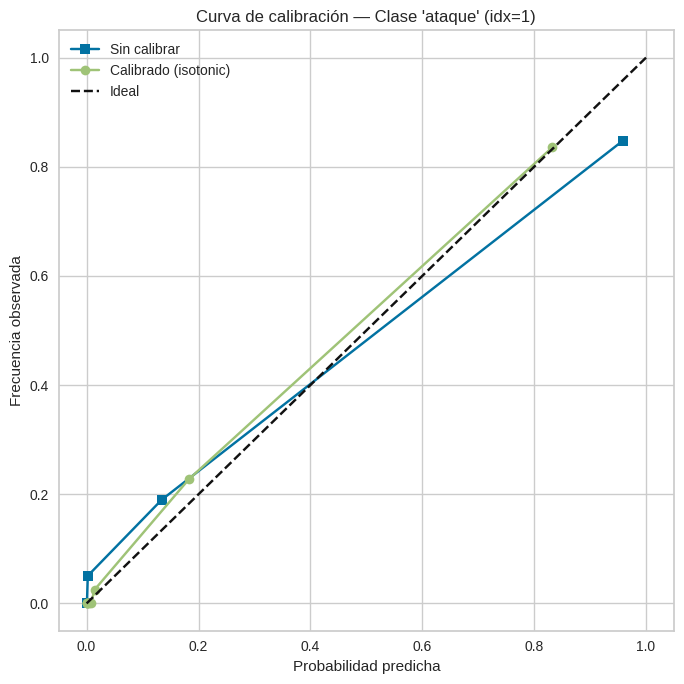

In [42]:
from sklearn.calibration import calibration_curve

# --- Elegir la clase a visualizar (por índice codificado) ---
clase_idx = 1  # cambia este índice según te interese
clase_label = label_encoder.inverse_transform([clase_idx])[0]  # nombre legible

# Probabilidades para esa clase (sin y con calibración)
prob_no_cal = probs_uncal[:, clase_idx]   # de xgb_red.predict_proba(X_test_red)
prob_cal    = probs_cal[:, clase_idx]     # de calib.predict_proba(X_test_red)

# Verdadero binario (uno-vs-rest) usando etiquetas codificadas
y_bin = (y_test_encoded == clase_idx).astype(int)

# Curvas de calibración (binarias) para esa clase
frac_pos_no_cal, mean_pred_no_cal = calibration_curve(
    y_bin, prob_no_cal, n_bins=10, strategy='quantile'
)
frac_pos_cal, mean_pred_cal = calibration_curve(
    y_bin, prob_cal, n_bins=10, strategy='quantile'
)

# Plot
plt.figure(figsize=(7, 7))
plt.plot(mean_pred_no_cal, frac_pos_no_cal, "s-", label="Sin calibrar")
plt.plot(mean_pred_cal,   frac_pos_cal,   "o-", label="Calibrado (isotonic)")
plt.plot([0, 1], [0, 1], "k--", label="Ideal")
plt.title(f"Curva de calibración — Clase '{clase_label}' (idx={clase_idx})")
plt.xlabel("Probabilidad predicha")
plt.ylabel("Frecuencia observada")
plt.legend()
plt.tight_layout()
plt.show()


La curva muestra cómo se calibran las probabilidades para la clase “ataque”.
La línea ideal es la diagonal negra. El modelo sin calibrar (azul) se desvía un poco, sobre todo en probabilidades altas. Con calibración isotónica (verde) la curva se acerca más a la diagonal, lo que significa que las probabilidades son más confiables.
Aunque bajó un poco el accuracy y el F1, el Brier Score mejoró, así que las predicciones calibradas son más realistas.

Mucho éxito!

<center>
<img src="https://i.pinimg.com/originals/55/3d/42/553d42bea9b10e0662a05aa8726fc7f4.gif" width=300>